# Introduction into regression analysis

In pattern recognition problem we have

$Y \in D_Y = \{w_1, ... , w_k\}$

is a set of unordered values, i.e. $Y$ - a qualitative variable

**Regression analysis**: $Y \in R$ is a real-valued variable.

Random samples of objects $ \{ o^{(1)}, ... , o^{(N)}\}$

Set of variables $X_1, ... , X_n$

Data table $ x^{(i)}_j = X_j(o^{(i)}),\space j = 1, ... , n; y^{(i)}=Y(o^{(i)}) \space i = 1, ... , N $

Purpose of analysis is to predict values of variable $Y$ depending on values $X$ for any new object by minimizing some expected loss $L(y_{pred}, y_{real})$

Usually we use OLS (ordinary least squares) loss function : $L(y_{pred}, y_{real}) = (y_{pred} - y_{real})^2$

## Approaches for regression:
* Parametric models
* Non-parametric
* SVM
* Logical rules (regression trees)
* ...


Our linear model will look like:
$$ Y^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + ... + \beta_nx^{(i)}_n + \epsilon^{(i)} $$

$ \epsilon $ - is supposed to be $N(0, \sigma)$, $\epsilon^{(i)}$ and $\epsilon^{(i)}$ are supposed to be independent for $i \neq j $

in matrix form:
**$$ Y = X\beta +  \epsilon $$**

# Examples of regression implementations (OLS)

* scikit-learn - easier to use
* statsmodel - provide stats out of the box (easier to perform statistical tests, and build confidence intervals), but interfaces are a bit harder
* tensorflow - we build linear regression with that library just to grasp a concept of computational graphs and SGD optimization


Coefficients: 
 [ 938.23786125] 152.918861826
Mean squared error: 2548.07
Variance score: 0.47


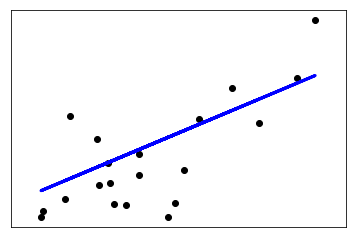

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [2]:
import numpy as np
import statsmodels.api as sm

spector_data = sm.datasets.spector.load()
X = sm.add_constant(spector_data.exog, prepend=False)
Y = spector_data.endog

print(type(X))

# Fit and summarize OLS model
mod = sm.OLS(exog=X, endog=Y)
res = mod.fit()

print(res.summary())

print('RMSE', np.mean((res.predict(X) - Y)**2))
print( res.predict(X).shape )

C:\Users\aagri\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'numpy.ndarray'>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Mon, 22 May 2017   Prob (F-statistic):            0.00157
Time:                        23:26:13   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0

# Tensorflow linear regression 
You can install it with:
```sh
pip install tensorflow
```
Our model will be small, so it should work fine with CPU.

Tensorflow tl;dr 

First you need to create computational graph with those functions

[tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) - reserve place for input

[tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) - parameters that you will optimize

tf.add, tf.multiply ... - operations (node of the computational graph) [Read the docs](https://www.tensorflow.org/api_docs/python/tf)

Define:
1. Cost function - it is also the same computational node (`cost` in example bellow)
2. create Optimizer 

When you have finished to creat your computational graph, you need to create Session -> Initialize variables -> Run optimizer/


Epoch: 0050 cost= 0.184046984 W= 0.432551 b= -0.514713
Epoch: 0100 cost= 0.171676040 W= 0.421669 b= -0.436433
Epoch: 0150 cost= 0.160733864 W= 0.411435 b= -0.36281
Epoch: 0200 cost= 0.151055381 W= 0.40181 b= -0.293564
Epoch: 0250 cost= 0.142494753 W= 0.392757 b= -0.228438
Epoch: 0300 cost= 0.134922847 W= 0.384242 b= -0.167185
Epoch: 0350 cost= 0.128225535 W= 0.376234 b= -0.109575
Epoch: 0400 cost= 0.122301847 W= 0.368702 b= -0.0553906
Epoch: 0450 cost= 0.117062427 W= 0.361618 b= -0.00442924
Epoch: 0500 cost= 0.112428330 W= 0.354955 b= 0.0435012
Epoch: 0550 cost= 0.108329616 W= 0.348689 b= 0.0885809
Epoch: 0600 cost= 0.104704455 W= 0.342795 b= 0.13098
Epoch: 0650 cost= 0.101498187 W= 0.337252 b= 0.170857
Epoch: 0700 cost= 0.098662414 W= 0.332039 b= 0.208362
Epoch: 0750 cost= 0.096154332 W= 0.327135 b= 0.243637
Epoch: 0800 cost= 0.093936160 W= 0.322524 b= 0.276814
Epoch: 0850 cost= 0.091974318 W= 0.318186 b= 0.308018
Epoch: 0900 cost= 0.090239316 W= 0.314107 b= 0.337365
Epoch: 0950 cost=

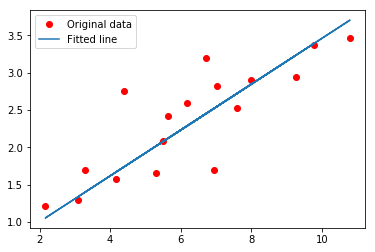

Testing... (Mean square loss Comparison)
Testing cost= 0.0793243
Absolute mean square loss difference: 0.00802358


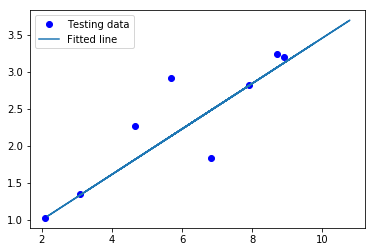

In [3]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


# Task:
1. download dataset from https://www.kaggle.com/harlfoxem/housesalesprediction, make train, test datasets
2. build linear regression  using `sqft_living` or `sqft_lot` of house age features 
3. build these regression models using different libraries (sklearn, statsmodel, tensorflow)
4. compare models using $R^2$, $R^2_{adj}$ and RMSE 

#### 1. Import data

Test size = 40% of all data points. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline
import os
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import numpy as np
from __future__ import print_function
import tensorflow as tf
import statsmodels.api as sm
import sklearn.preprocessing as prep
from sklearn.linear_model import Ridge, Lasso 

C:\Users\aagri\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
Working_dir = os.getcwd() 
house_data = pd.read_csv( os.path.join( Working_dir, "kc_house_data.csv" ) )

In [6]:
X_train, X_test, y_train, y_test = train_test_split( house_data.sqft_living, house_data.price,\
                                                     random_state = 100, test_size = 0.4 )

In [7]:
X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

#### 2-3. Linear regression models

- sklearn

In [8]:
X_train_sk = X_train.reshape( X_train.shape[0], 1 )
y_train_sk = y_train.reshape( y_train.shape[0], 1 )
X_test_sk  = X_test.reshape( X_test.shape[0], 1 )
y_test_sk  = y_test.reshape( y_test.shape[0], 1 )

In [9]:
# Create linear regression object
regr_sk = linear_model.LinearRegression()

# Train the model using the training sets
regr_sk.fit( X_train_sk, y_train_sk)

# Predict the values using the test set
y_pred_sk = regr_sk.predict(X_test_sk)

----------

- statsmodel

In [10]:
# Prepare data
X_train_sm = X_train_sk.copy()
X_train_sm = sm.add_constant(X_train_sm, prepend=False)
y_train_sm = y_train.copy()
X_test_sm  = X_test_sk.copy()
X_test_sm  = sm.add_constant (X_test_sm, prepend=False)

# Fit OLS model
mod_sm = sm.OLS(y_train_sm, X_train_sm)
res_sm = mod_sm.fit()

# Predict using OLS model
y_pred_sm = res_sm.predict ( X_test_sm )

---------

- tensorflow

In [11]:
rng = np.random

# Parameters
learning_rate = 1e-7
training_epochs = 40
display_step = 10

# Training Data
n_samples = X_train.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(X_train, y_train):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: X_train, Y:y_train})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: X_train, Y: y_train})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * X_train.shape[0]),
        feed_dict={X: X_train, Y: y_train})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", \
          abs(training_cost - testing_cost))
    
    y_pred_tf = sess.run(W) * X_test + sess.run(b)

Epoch: 0010 cost= 34764898304.000000000 W= 261.918 b= 1.11022
Epoch: 0020 cost= 34756747264.000000000 W= 263.428 b= 1.10405
Epoch: 0030 cost= 34756722688.000000000 W= 263.436 b= 1.09728
Epoch: 0040 cost= 34756722688.000000000 W= 263.436 b= 1.0905
Optimization Finished!
Training cost= 3.47567e+10 W= 263.436 b= 1.0905 

Testing... (Mean square loss Comparison)
Testing cost= 3.47567e+10
Absolute mean square loss difference: 0.0


----


#### Visually compare the models

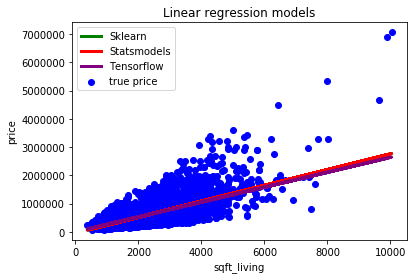

In [12]:
# Plot outputs
plt.scatter(X_test_sk, y_test_sk,  color='blue', label = 'true price')
plt.plot(X_test_sk, y_pred_sk, color='green',
         linewidth=3, label = 'Sklearn')
plt.plot(X_test, y_pred_sm, color='red',
         linewidth=3, label = 'Statsmodels')

plt.plot(X_test_sk, y_pred_tf, color='purple',
         linewidth=3, label = 'Tensorflow')

plt.xlabel( 'sqft_living' )
plt.ylabel( 'price' )

plt.title('Linear regression models')
plt.legend(loc='upper left')
plt.show()

Remark: sklearn and statsmodels (almost) coinside

----

#### Compare $R^2$, $R^2_{adj}, RSME$

In [13]:
r_table = pd.DataFrame( 0, index = [r'$R^2$',\
                                    r'$R^2_{adj}$',\
                                    'RMSE'], columns = ["sklearn", "statsmodels", "tensorflow"])
def rmse( pred, true):
    return ( np.sqrt( np.mean(( pred - true)**2) ) )

# sklearn

# R
r = r_table.iloc[0,0] = regr_sk.score(X_test_sk, y_test_sk)

# R_adj
expl_var = 1.
r_table.iloc[1,0] = r - (1. - r )* expl_var / ( y_test.shape[0] - expl_var - 1. )

# RMSE
r_table.iloc[2,0] = rmse ( regr_sk.predict(X_test_sk), y_test_sk ) 

# statsmodels

# RMSE
r_table.iloc[2,1] = rmse (y_pred_sm, y_test)

# R (using test data)
mod_sm = sm.OLS(y_test, X_test_sm)
res_sm = mod_sm.fit()
r_table.iloc[0,1] = res_sm.rsquared

# R_adj
r_table.iloc[1,1] = res_sm.rsquared_adj

# Tensorflow
# R
SSreg = np.dot( y_pred_tf - np.mean( y_test ),  y_pred_tf - np.mean( y_test ) )
SStot = np.dot( y_test - np.mean( y_test ),     y_test - np.mean( y_test ) )
r = r_table.iloc[0,2] = SSreg / SStot

# R_adj
r_table.iloc[1,2] =  r - (1. - r )* expl_var / ( y_test.shape[0] - expl_var - 1. )

# RMSE
r_table.iloc[2,2] = rmse ( y_pred_tf, y_test )
r_table

,sklearn,statsmodels,tensorflow
$R^2$,0.496740,0.496890,0.436672
$R^2_{adj}$,0.496682,0.496832,0.436606
RMSE,258903.324499,258903.324499,259585.517629


----


### Resume

Results for statsmodels and sklearn are close to each other. $R^2$, $R^2_{adj}$ are about 50% which indicates that models explain approximately 50% of the variability of the test data. RMSE values are also very close. 

Tensorflow has produced worse results. The number of epochs was chosen such that the cost functional value did not change further. RMSE value is greater than in previous two models and $R^2$, $R^2_{adj}$ are smaller. It may be caused by the slowness of the gradient decent method.

-----

For myself:

RSME (root-mean-square error) - square root of the mean of sum of squares of errors in prediction - the less the better

r2 ~ 0% indicates that the model explains none of the variability of the response data around its mean.

r2 ~ 100% indicates that the model explains all the variability of the response data around its mean.
 
r2 adjusted - The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The adjusted R-squared can be negative, but it’s usually not.  It is always lower than the R-squared.

------


# Categorical variables

Task:
1. Answer the questions:
    - What is a categorical variables?
    - Which features from the house sales dataset are categical?
    - How can you make model using these features?

### - What is a categorical variables?

Categorical variables cannot be ordered or compared with anything else than equality or inequality.

E.g.: gender: F/M, colors, names

----

### - Which features from the house sales dataset are categical?

waterfront, view

zipcode - if we regard it as to the fact of belonging to a certain district

-----

### - How can you make model using these features?

We can convert them into numerical (ordinal) features.

E.g. differnet colors are coded as numbers (red - 1, orange - 2,...) 

------

## Regularization

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It tends to reduce variance more than it increases bias, and thus minimizes overfitting.

Common regularization techniques for linear models:

- **Ridge regression** (also known as "L2 regularization"): shrinks coefficients toward zero (but they never reach zero)
- **Lasso regularization** (also known as "L1 regularization"): shrinks coefficients all the way to zero
- **ElasticNet regularization**: balance between Ridge and Lasso

Lasso regularization is useful if we believe many features are irrelevant, since a feature with a zero coefficient is essentially removed from the model. Thus, it is a useful technique for feature selection.

How does regularization work?

- A tuning parameter alpha (or sometimes lambda) imposes a penalty on the size of coefficients.
- Instead of minimizing the "loss function" (mean squared error), it minimizes the "loss plus penalty".
- A tiny alpha imposes no penalty on the coefficient size, and is equivalent to a normal linear model.
- Increasing the alpha penalizes the coefficients and shrinks them toward zero.


![reg_picture](https://qph.ec.quoracdn.net/main-qimg-2a88e2acc009fa4de3edeb51e683ca02)


Task:
1. Build crosscorrelation table for features
2. Fit linear regression model using at least 2 highly correlated features
3. Plot values of regrssion coefficients as a function of regularization parameter $\alpha$ for LASSO and RIDGE models. [example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)

### 1. Build crosscorrelation table for features

In [14]:
# Correlation matrix
cross_cor = house_data.corr()

# Delete ones one the diagonal
cross_cor_0 = cross_cor.replace(to_replace=1., value=0.)

#### Find 2 highly correlated features

In [15]:
cross_cor_0[cross_cor_0 == cross_cor_0.as_matrix().max()].idxmax()

id                       NaN
price                    NaN
bedrooms                 NaN
bathrooms                NaN
sqft_living       sqft_above
sqft_lot                 NaN
floors                   NaN
waterfront               NaN
view                     NaN
condition                NaN
grade                    NaN
sqft_above       sqft_living
sqft_basement            NaN
yr_built                 NaN
yr_renovated             NaN
zipcode                  NaN
lat                      NaN
long                     NaN
sqft_living15            NaN
sqft_lot15               NaN
dtype: object

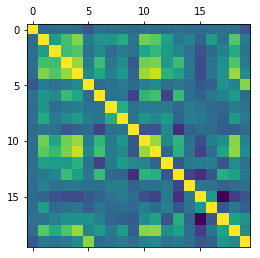

In [16]:
# Just a picture of cross correlation matrix
plt.matshow(cross_cor)

In [17]:
# Extract data
data_rgl = house_data.loc[:, ['sqft_living', 'sqft_above']]

### 2. Fit linear regression model using at least 2 highly correlated features
### 3. Plot values of regrssion coefficients as a function of regularization parameter $\alpha$ for LASSO and RIDGE models.

Ridge model - fit and plot

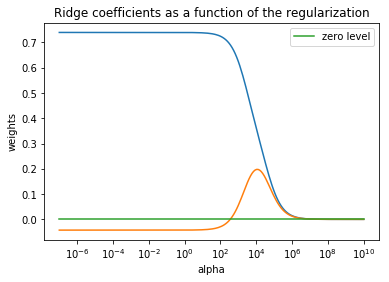

In [18]:
# Center the data
X = prep.scale(data_rgl)
y = prep.scale(house_data.price)

# Denote Ridge model
n_alphas = 200
alphas = np.logspace(-7, 10, n_alphas)
ridge = Ridge(fit_intercept=False)

# Compute coeffitients
coefs = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# Plot coefficients
ax = plt.gca()

ax.plot(alphas, coefs)
ax.plot(alphas, np.zeros(alphas.shape[0]), label='zero level')
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend()
plt.show()

Lasso model - fit and plot

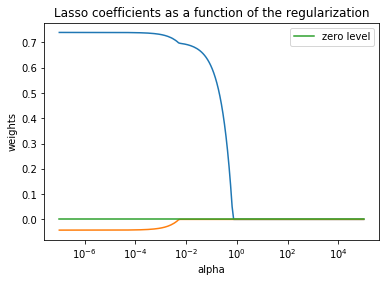

In [19]:
alphas = np.logspace(-7, 5, n_alphas)

lasso = Lasso(fit_intercept=False)

# Compute coeffitients
coefs = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.plot(alphas, np.zeros(alphas.shape[0]), label='zero level')
ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.legend()
plt.show()

### Resume

Ridge coefficients are components of $w$ in the cost function formula:
$$ 
\|y - Xw\|^2_2 + \alpha \cdot \|w\|^2_2$$

Lasso coefficients are components of $w$ in the cost function formula:

$$ \frac{1}{2 \cdot n_{samples}} \cdot
\|y - Xw\|^2_2 + \alpha \cdot \|w\|_1$$


In both cases the larger $\alpha$ the stronger regularization and the coefficients approach zero, otherwise the solution approaches OLS (when $\alpha$ is about zero).

# Regression trees 

Task:
1. try `sklearn.tree.DecisionTreeRegressor`
2. compare models using $R^2$, $R^2_{adj}$ and RMSE 


In [20]:
from sklearn.tree import DecisionTreeRegressor
X_train_dt = X_train_sk.copy()
X_test_dt = X_test_sk.copy()

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit( X_train_dt, y_train_sk )
y_pred_dt = regressor.predict ( X_test_dt )

In [23]:
# R
r = r_table.loc[:,'decision tree'] = regressor.score( X_test_dt, y_test )

#R_adj
r_table.iloc[1,3] = r - (1. - r )* expl_var / ( y_test.shape[0] - expl_var - 1. )

# RMSE
r_table.iloc[2,3] = rmse ( y_pred_dt, y_test )

r_table

,sklearn,statsmodels,tensorflow,decision tree
$R^2$,0.496740,0.496890,0.436672,0.475842
$R^2_{adj}$,0.496682,0.496832,0.436606,0.475782
RMSE,258903.324499,258903.324499,259585.517629,264224.117837


### Resume

Decision tree regressor has given better results than tensrflow approach according to $R^2$ and $R^2_{adjust}$, but worse than sklearn and statsmodels. However, RMSE value is the worst for the decision tree

-----


# XGBoost regressor 
I have mentioned it here only for you to know about the existence of that model